<a href="https://colab.research.google.com/github/gurudattamanpreet/Medical-Research/blob/main/Medical_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

**CONTEXT:** Medical research university X is undergoing a deep research on patients with certain conditions.  University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by  the client by providing different datasets to the AI team for developing a AIML model which can predict the  condition of the patient depending on the received test results.

**DATA DESCRIPTION:** The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and  orientation of the condition to their body part.

**PROJECT OBJECTIVE:** To Demonstrate the ability to fetch, process and leverage data to generate useful predictions  by training Supervised Learning algorithms.



**STEPS AND TASK [30 Marks]:**

1. **Data Understanding: [5 Marks]**

* Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]
* Print Shape and columns of all the 3 DataFrames. [1 Mark]
* Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]
* Print DataTypes of all the 3 DataFrames. [1 Mark]
* Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]

2. **Data Preparation and Exploration: [5 Marks]**
* Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]
    * *For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’*
* Combine all the 3 DataFrames to form a single DataFrame [1 Marks]
    * *Checkpoint: Expected Output shape = (310,7)*
* Print 5 random samples of this DataFrame [1 Marks]
* Print Feature-wise percentage of Null values. [1 Mark]
* Check 5-point summary of the new DataFrame. [1 Mark]

3. **Data Analysis: [10 Marks]**
* Visualize a heatmap to understand correlation between all features [2 Marks]
* Share insights on correlation. [2 Marks]
    * *Features having stronger correlation with correlation value.*
    * *Features having weaker correlation with correlation value.*
* Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]
* Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]
* Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

4. **Model Building: [6 Marks]**
* Split data into X and Y. [1 Marks]
* Split data into train and test with 80:20 proportion. [1 Marks]
* Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]
* Print all the possible performance metrics for both train and test data. [2 Marks]

5. **Performance Improvement: [4 Marks]**
* Experiment with various parameters to improve performance of the base model. [2 Marks]
    * *(Optional: Experiment with various Hyperparameters - Research required)*
* Clearly showcase improvement in performance achieved. [1 Marks]
    * *For Example:*
        * *Accuracy: +15% improvement*
        * *Precision: +10% improvement.*
* Clearly state which parameters contributed most to improve model performance. [1 Marks]

# Q1 Data Understanding

In [1]:
#A

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [3]:
url1='https://raw.githubusercontent.com/gurudattamanpreet/Medical-Research/refs/heads/main/Normal.csv'
url2='https://raw.githubusercontent.com/gurudattamanpreet/Medical-Research/refs/heads/main/Type_S.csv'
url3='https://raw.githubusercontent.com/gurudattamanpreet/Medical-Research/refs/heads/main/Type_H.csv'

In [4]:
# Read CSVs
normal = pd.read_csv(url1)
type_s = pd.read_csv(url2)
type_h = pd.read_csv(url3)

In [5]:
#B

In [6]:
# Shapes of 3 dataframes
print(normal.shape)
print(type_s.shape)
print(type_h.shape)

(100, 7)
(150, 7)
(60, 7)


In [7]:
#C

In [8]:
if set(normal.columns) == set(type_s.columns) == set(type_h.columns):
    print("All 3 DataFrames have same columns")
else:
    print("Some difference in one of the DataFrames")

All 3 DataFrames have same columns


All the 3 Dataframes are having same columns, hence can be concatenated

In [9]:
#D

In [10]:
# Shapes of 3 dataframes
print('normal \n',normal.dtypes)
print('*'*25)
print('type_s \n',type_s.dtypes)
print('*'*25)
print('type_h \n',type_h.dtypes)

normal 
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
*************************
type_s 
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
*************************
type_h 
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [11]:
#E

In [12]:
# Shapes of 3 dataframes
print(normal['Class'].value_counts())
print('*****'*10)
print(type_s['Class'].value_counts())
print('*****'*10)
print(type_h['Class'].value_counts())
print('*****'*10)

Class
Normal    73
Nrmal     27
Name: count, dtype: int64
**************************************************
Class
Type_S    133
tp_s       17
Name: count, dtype: int64
**************************************************
Class
Type_H    37
type_h    23
Name: count, dtype: int64
**************************************************


2 values having same meaning are observed for each Class

# Q2 Data Preparation and Exploration

In [13]:
#A

In [14]:
normal['Class'] = normal['Class'].apply(lambda x: 'normal')
type_s['Class'] = type_s['Class'].apply(lambda x: 'type_s')
type_h['Class'] = type_h['Class'].apply(lambda x: 'type_h')


In [16]:
# B
df = pd.concat([normal,type_s,type_h])

In [17]:
df.shape

(310, 7)

In [18]:
df['Class'].value_counts()

,count
Class,
type_s,150
normal,100
type_h,60


In [19]:
#C

In [20]:
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
117,80.817771,19.238981,61.642451,61.578791,89.471834,44.167602,type_s
26,26.147921,10.759454,14.000000,15.388468,125.203296,-10.093108,type_h
49,41.767732,17.899402,20.030886,23.868330,118.363389,2.062963,type_h
34,94.174822,15.380770,67.705721,78.794052,114.890113,53.255220,type_s
45,67.538182,14.655042,58.001429,52.883139,123.632260,25.970206,normal


In [21]:
#D
df.isna().sum()/len(df)

,0
P_incidence,0.0
P_tilt,0.0
L_angle,0.0
S_slope,0.0
P_radius,0.0
S_Degree,0.0
Class,0.0


In [22]:
#E
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# Q3 Data Analysis

In [23]:
#A

<Axes: >

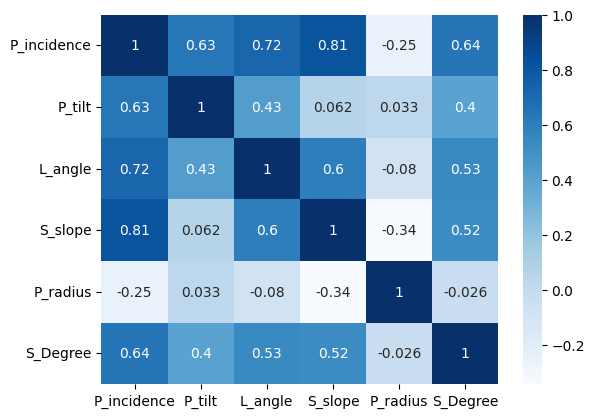

In [25]:
sns.heatmap(df.select_dtypes(include=[int,float]).corr(),cmap='Blues',annot=True)

In [26]:
#B

#### 1. S_slope and P_incidence is having stronger positive correlation i.e. 0.81.
#### 2. L_angle and P_incidence is having stronger positive correlation i.e. 0.72.
#### 3. P_tilt is having weaker correlation with S_Slope and P_radius respectively with values 0.062 and 0.033.

In [27]:
#C

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [29]:
# There are some duplicated index for the merged dataframe
df[df.index.duplicated()]

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,type_s
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,type_s
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,type_s
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,type_s
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,type_s
...,...,...,...,...,...,...,...
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,type_h
56,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,type_h
57,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,type_h
58,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,type_h


In [30]:
# The duplicated index will cause an error, so trying to reset the index
df.reset_index(inplace=True)

In [31]:
#Now there are no duplicated index
df[df.index.duplicated()]

,index,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class


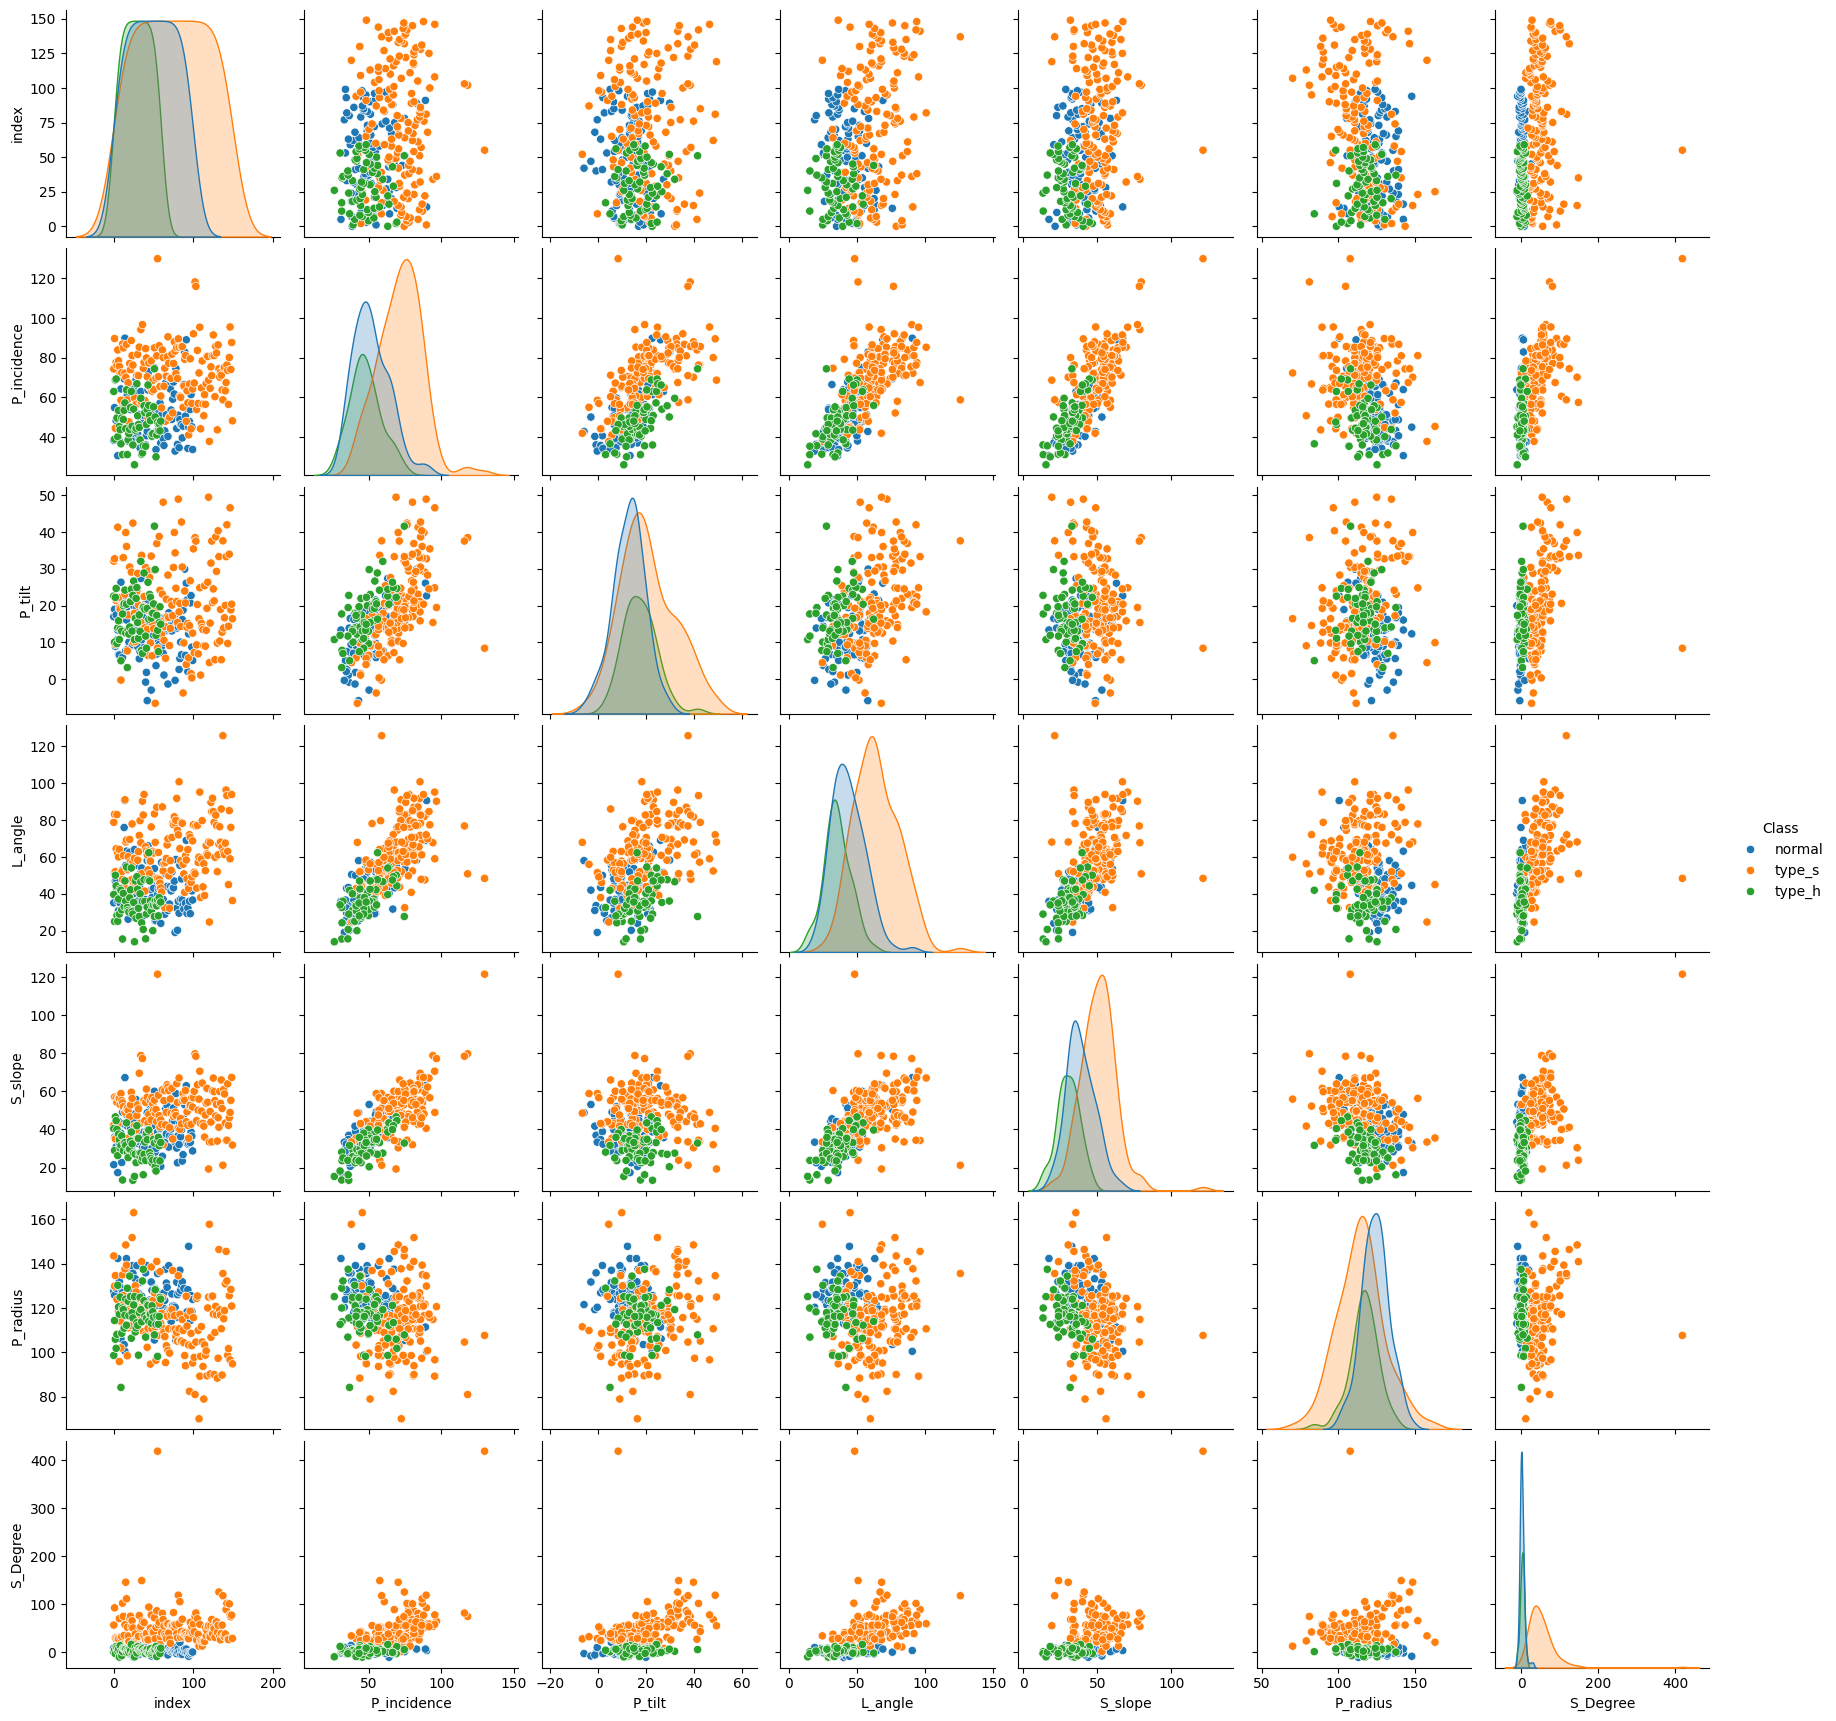

In [32]:
sns.pairplot(df,hue='Class')

#### 1. Normal distribution is observed for all the 3 classes separately for all the features except few
#### 2. type_h datapoints are observed to have higher values for all the features

In [33]:
# D

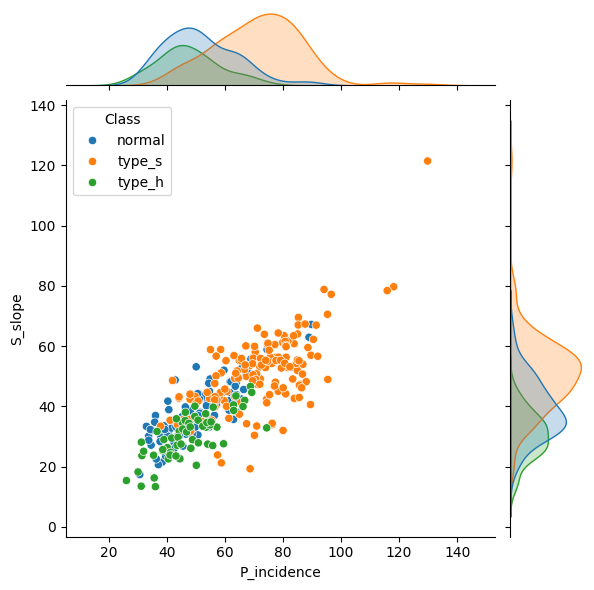

In [36]:
sns.jointplot(x='P_incidence', y='S_slope', data=df, hue='Class')

#### P_incidnece and S_slope are having strong linear relationship.
#### Skewness is observed in both the casese for all the 3 classes separately.

In [37]:
# E

In [38]:
df.columns

Index(['index', 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius',
       'S_Degree', 'Class'],
      dtype='object')

<Axes: xlabel='Class', ylabel='S_slope'>

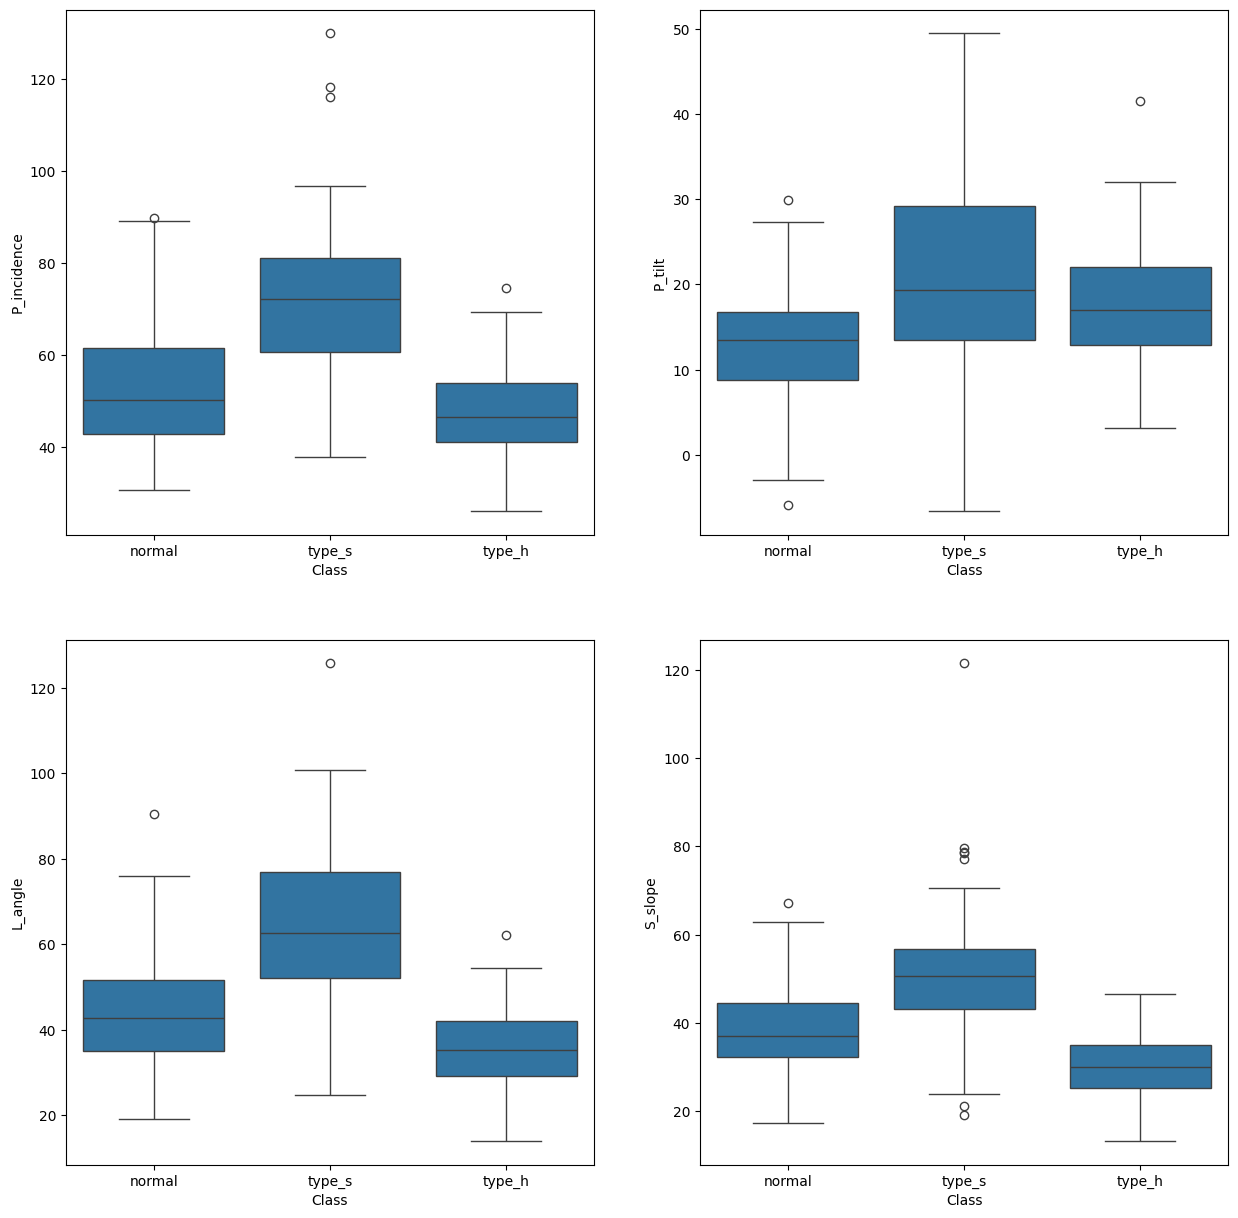

In [39]:
f, axes = plt.subplots(2, 2)
f.set_figheight(15)
f.set_figwidth(15)
sns.boxplot(  y="P_incidence", x= "Class", data=df,  orient='v' , ax=axes[0][0])
sns.boxplot(  y="P_tilt", x= "Class", data=df,  orient='v' , ax=axes[0][1])
sns.boxplot(  y="L_angle", x= "Class", data=df,  orient='v' , ax=axes[1][0])
sns.boxplot(  y="S_slope", x= "Class", data=df,  orient='v' , ax=axes[1][1])

#### Outliers observed in the features: S_slope, P_incidence

# Q4. Model Building

In [40]:
#A

In [41]:
X = df.drop('Class',axis=1)
y = df['Class']

In [42]:
#B

In [43]:
x_train, x_test,y_train,y_test = train_test_split(X,y,random_state=67,test_size=.2)

In [44]:
# C

In [45]:
knn = KNeighborsClassifier()

In [46]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [48]:
#D
print("Train Accuracy is: ",accuracy_score(y_train,train_pred))
print('*'*40)
print("Test Accuracy is: ",accuracy_score(y_test,test_pred))
print('*'*40)
print("Training metrics: \n",classification_report(y_train,train_pred))
print('*'*40)
print("Testing metrics: \n",classification_report(y_test,test_pred))
print('*'*40)

Train Accuracy is:  0.8911290322580645
****************************************
Test Accuracy is:  0.8548387096774194
****************************************
Training metrics: 
               precision    recall  f1-score   support

      normal       0.83      0.85      0.84        82
      type_h       0.78      0.84      0.81        45
      type_s       0.98      0.93      0.96       121

    accuracy                           0.89       248
   macro avg       0.86      0.88      0.87       248
weighted avg       0.90      0.89      0.89       248

****************************************
Testing metrics: 
               precision    recall  f1-score   support

      normal       0.81      0.72      0.76        18
      type_h       0.74      0.93      0.82        15
      type_s       0.96      0.90      0.93        29

    accuracy                           0.85        62
   macro avg       0.84      0.85      0.84        62
weighted avg       0.86      0.85      0.86        62


# Q5 Performance Improvement

In [49]:
knn_1 = KNeighborsClassifier(n_neighbors=25,algorithm='ball_tree',weights='distance',p=2)
knn_1.fit(x_train,y_train)
train_pred = knn_1.predict(x_train)
test_pred = knn_1.predict(x_test)

print("Train Accuracy is: ",accuracy_score(y_train,train_pred))
print('*'*40)
print("Test Accuracy is: ",accuracy_score(y_test,test_pred))
print('*'*40)
print("Training metrics: \n",classification_report(y_train,train_pred))
print('*'*40)
print("Testing metrics: \n",classification_report(y_test,test_pred))
print('*'*40)

Train Accuracy is:  1.0
****************************************
Test Accuracy is:  0.9032258064516129
****************************************
Training metrics: 
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00        82
      type_h       1.00      1.00      1.00        45
      type_s       1.00      1.00      1.00       121

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

****************************************
Testing metrics: 
               precision    recall  f1-score   support

      normal       0.83      0.83      0.83        18
      type_h       0.82      0.93      0.88        15
      type_s       1.00      0.93      0.96        29

    accuracy                           0.90        62
   macro avg       0.89      0.90      0.89        62
weighted avg       0.91      0.90      0.90        62

**************

In [50]:
#B

1. Training accuracy has gone up by 10%
2. Testing Precision and recall values of type_h have gone up by 4% by compromising 'type_s' and 'normal'

In [51]:
# C

- Parameter 'weights' = 'distance' played key role in improving training accuracy
- When 'weights' = 'distance' has higher influence of neighboring datapoints instead of uniform resulting into better predictions.